In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
#Tamaño de la red
L = 100
# Numero de nodos
Nv = L*L
#Neighbors
Neighbors = []
#Coordenadas de los nodos
Coordinates = [(x,y) for y in range(L) for x in range(L) ]

In [3]:
for y in range(L):
    for x in range(L):
        Neighbors.append([((x+1)%L,y),((x-1)%L,y),((x),(y+1)%L),(x,(y-1)%L)])

In [4]:
State = np.zeros([L,L])
for y in range(L):
    for x in range(L):
        State[x][y] = np.random.choice([1,-1], p = [0.5,0.5])

In [5]:
#Cambiamos el spin
k = np.random.choice(list(range(Nv)))
xk,yk = Coordinates[k]

In [6]:
#Calculamos el cambio de energia
T = 2.4
deltaE = 0

for j in range(len(Neighbors[k])):
    x,y = Neighbors[k][j]
    deltaE += 2*State[xk][yk]*State[x][y]

if deltaE>0:
    expval = np.exp(-deltaE/T)
    State[xk][yk] = State[xk][yk]*np.random.choice([-1,1],p = [expval,1-expval])
else:
    State[xk][yk] = -1*State[xk][yk]

In [8]:
#Metropolis consecutivo
%time
#State = np.ones([L,L])
T = 2.0
n_flips = 10*Nv
Mlist = [] #Magnetizacion 
time = []
for t in range(n_flips):
    
    k = np.random.choice(list(range(Nv)))
    xk,yk = Coordinates[k]
    deltaE = 0

    for j in range(len(Neighbors[k])):
        x,y = Neighbors[k][j]
        deltaE += 2*State[xk][yk]*State[x][y]

    if deltaE>0:
        expval = np.exp(-deltaE/T)
        State[xk][yk] = State[xk][yk]*np.random.choice([-1,1],p = [expval,1-expval])
    else:
        State[xk][yk] = -1*State[xk][yk]
    
    if t%Nv:
        Mlist.append(np.mean(State.flatten()))
        time.append(t/Nv)
    
    
    #if t/Nv in [0,1,2,4,6,10,20,40,100]:
        
        #plt.title(r't = ' + str(t/Nv))
        #Estado simulado
        #plt.imshow(State)
        #plt.colorbar()
        #plt.show()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs


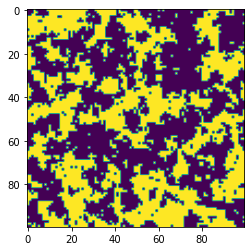

In [9]:
#Estado simulado
plt.imshow(State)

plt.show()

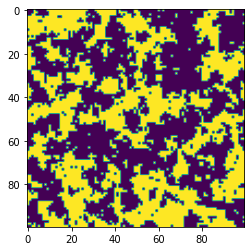

In [10]:
#Estado inicial
plt.imshow(State)
plt.show()

In [ ]:
#Magnetizacion

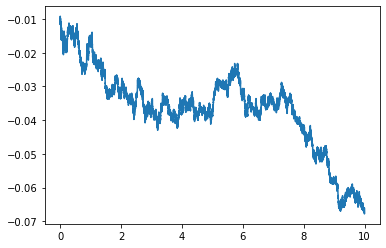

In [11]:
plt.plot(time, Mlist)
plt.show()

# Algortimo de Wolff

In [2]:
#Tamaño de la red
L = 20
# Numero de nodos
Nv = L*L
#Neighbors
Neighbors = []
#Coordenadas de los nodos
Coordinates = [(x,y) for y in range(L) for x in range(L) ]

In [3]:
for y in range(L):
    for x in range(L):
        Neighbors.append([((x+1)%L,y),((x-1)%L,y),((x),(y+1)%L),(x,(y-1)%L)])

In [4]:
State = np.zeros([L,L])
for y in range(L):
    for x in range(L):
        State[x][y] = np.random.choice([1,-1], p = [0.5,0.5])

In [6]:
#Metropolis consecutivo
%time
#State = np.ones([L,L])
T = 2.5
n_flips = 10*Nv
Mlist = [] #Magnetizacion 
time = []
for t in range(n_flips):
    
    k = np.random.choice(list(range(Nv)))
    xk,yk = Coordinates[k]
    deltaE = 0

    for j in range(len(Neighbors[k])):
        x,y = Neighbors[k][j]
        deltaE += 2*State[xk][yk]*State[x][y]

    if deltaE>0:
        expval = np.exp(-deltaE/T)
        State[xk][yk] = State[xk][yk]*np.random.choice([-1,1],p = [expval,1-expval])
    else:
        State[xk][yk] = -1*State[xk][yk]
    
    if t%Nv:
        Mlist.append(np.mean(State.flatten()))
        time.append(t/Nv)
    
    
    #if t/Nv in [0,1,2,4,6,10,20,40,100]:
        
        #plt.title(r't = ' + str(t/Nv))
        #Estado simulado
        #plt.imshow(State)
        #plt.colorbar()

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs


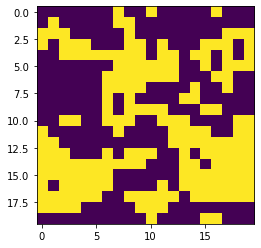

In [66]:
#Estado inicial
plt.imshow(State)
plt.show()

In [150]:
#Elegimos el nodo
k = np.random.choice(list(range(Nv)))
xk, yk = Coordinates[k]

In [151]:
#El nodo de las coordenadas es 
yk*L+xk

219

In [152]:
#Vemos los vecinos
p_add = 1-np.exp(-2/T)
Pocket = [k]
Cluster = [k]
while Pocket != []:
    k = np.random.choice(Pocket)
    xk, yk = Coordinates[k]
    for x,y in Neighbors[k]:
        if State[x][y] == State[xk][yk]:
            node = y*L + x
            if node not in Cluster:
                if np.random.rand()<p_add:
                    Pocket.append(node)
                    Cluster.append(node)
    Pocket.remove(k)

In [153]:
State_copy = np.copy(State)

In [154]:
#Cambiamos el estado
for k in Cluster:
    xk, yk = Coordinates[k]
    State[xk][yk] = -1*State[xk][yk]
    State_copy[xk][yk] = 0

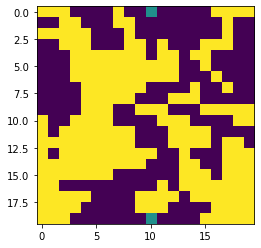

In [155]:
#Estado final
plt.imshow(State_copy)
plt.show()

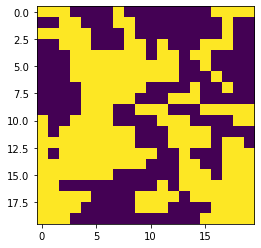

In [156]:
#Estado final
plt.imshow(State)
plt.show()

# C++

In [47]:
magnetizacionesstate = np.loadtxt('State.dat')

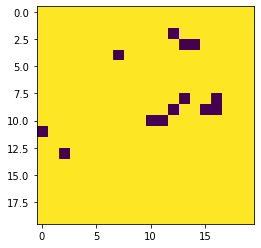

In [48]:
#Estado final
plt.imshow(state)
plt.show()

In [49]:
magnetizacion = np.loadtxt('Magnetization.dat')

Text(0, 0.5, 'm(t)')

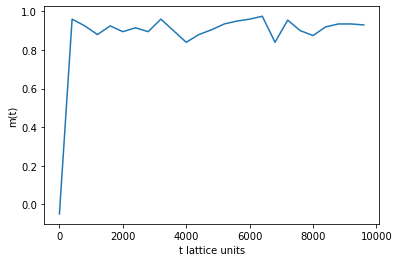

In [50]:
plt.plot(magnetizacion[:,0],magnetizacion[:,1])
plt.xlabel(r"t lattice units")
plt.ylabel(r"m(t)")

Text(0, 0.5, 'E')

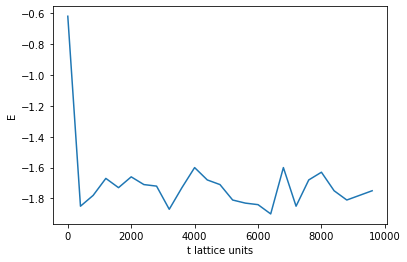

In [51]:
plt.plot(magnetizacion[:,0],magnetizacion[:,2])
plt.xlabel(r"t lattice units")
plt.ylabel(r"E")

# Thermalization

In [76]:
magnetizacion = np.loadtxt('Results_Ensemble.dat')

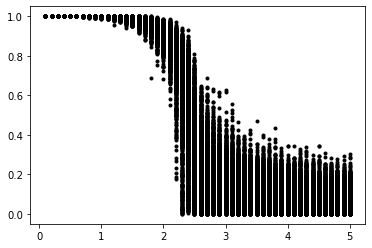

In [77]:
plt.plot(magnetizacion[:,0],abs(magnetizacion[:,1]),'k.')
plt.show()

In [78]:
Temperture = np.unique(magnetizacion[:,0])
Average_n_spin = []
for T in Temperture:
    Average_n_spin.append(np.mean(abs(magnetizacion[:,1][magnetizacion[:,0] == T])))

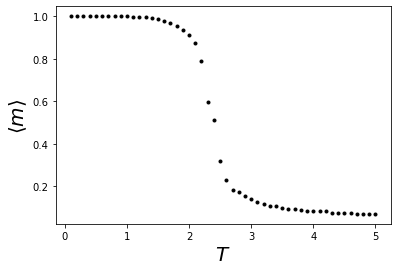

In [84]:
plt.plot(Temperture,Average_n_spin,'k.')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle m \rangle$', size = 20)
plt.show()

In [95]:
Temperture = np.unique(magnetizacion[:,0])
var_n_spin = []
for T in Temperture:
    var_n_spin.append((np.var(abs(magnetizacion[:,1][magnetizacion[:,0] == T])))/T)

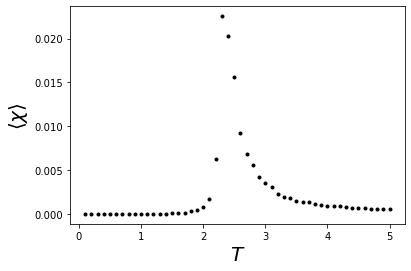

In [96]:
plt.plot(Temperture,var_n_spin,'k.')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle \chi \rangle$', size = 20)
plt.show()

In [87]:
Temperture = np.unique(magnetizacion[:,0])
Energy_n_spin = []
for T in Temperture:
    Energy_n_spin.append(np.mean(magnetizacion[:,2][magnetizacion[:,0] == T]))

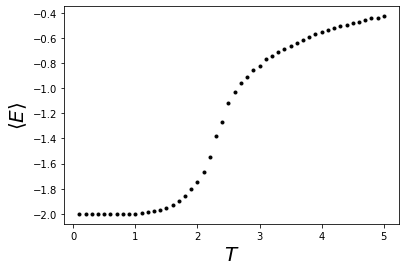

In [88]:
plt.plot(Temperture,Energy_n_spin,'k.')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle E \rangle$', size = 20)
plt.show()

In [98]:
Temperture = np.unique(magnetizacion[:,0])
var_energy_n_spin = []
for T in Temperture:
    var_energy_n_spin.append(np.var(magnetizacion[:,2][magnetizacion[:,0] == T])/T**2)

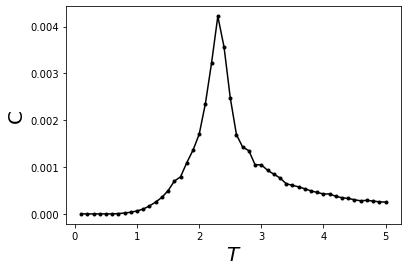

In [101]:
plt.plot(Temperture,var_energy_n_spin,'k.-')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'C', size = 20)
plt.show()

# WS_p0

In [7]:
magnetizacion = np.loadtxt('./Networks/WS_p0/Results_Ensemble.dat')

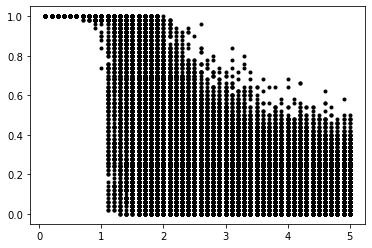

In [8]:
plt.plot(magnetizacion[:,0],abs(magnetizacion[:,1]),'k.')
plt.show()

In [9]:
Temperture = np.unique(magnetizacion[:,0])
Average_n_spin = []
for T in Temperture:
    Average_n_spin.append(np.mean(abs(magnetizacion[:,1][magnetizacion[:,0] == T])))

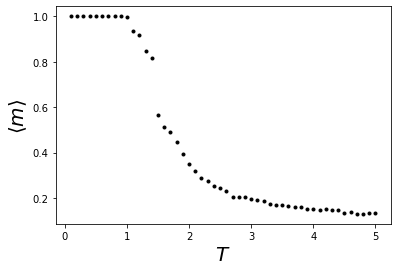

In [10]:
plt.plot(Temperture,Average_n_spin,'k.')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle m \rangle$', size = 20)
plt.show()

In [11]:
Temperture = np.unique(magnetizacion[:,0])
var_n_spin = []
for T in Temperture:
    var_n_spin.append((np.var(abs(magnetizacion[:,1][magnetizacion[:,0] == T])))/T)

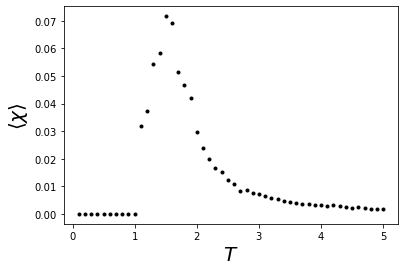

In [12]:
plt.plot(Temperture,var_n_spin,'k.')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle \chi \rangle$', size = 20)
plt.show()

In [15]:
Temperture = np.unique(magnetizacion[:,0])
Energy_n_spin = []
for T in Temperture:
    Energy_n_spin.append(np.mean(magnetizacion[:,2][magnetizacion[:,0] == T]))

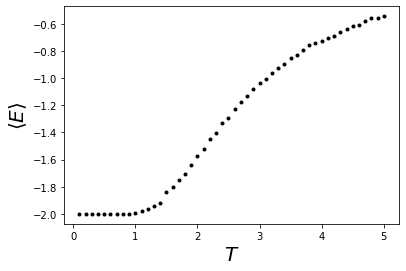

In [16]:
plt.plot(Temperture,Energy_n_spin,'k.')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'$\langle E \rangle$', size = 20)
plt.show()

In [17]:
Temperture = np.unique(magnetizacion[:,0])
var_energy_n_spin = []
for T in Temperture:
    var_energy_n_spin.append(np.var(magnetizacion[:,2][magnetizacion[:,0] == T])/T**2)

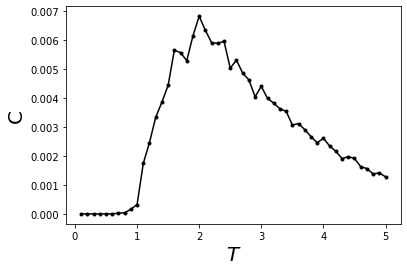

In [18]:
plt.plot(Temperture,var_energy_n_spin,'k.-')
plt.xlabel(r'$T$', size = 20)
plt.ylabel(r'C', size = 20)
plt.show()

# REDES

In [2]:
#Todas las redes
magnetizaciones = []
for element in glob.glob('./Networks/**/Results_Ensemble.dat'):
    magnetizaciones.append(np.loadtxt(element))

In [3]:
import itertools
marker = itertools.cycle(('1', '+', 'v', 'o', '*')) 

In [4]:
labels = ['WS_p0','WS_p0.1', 'ER', 'BAm2','BAm1']

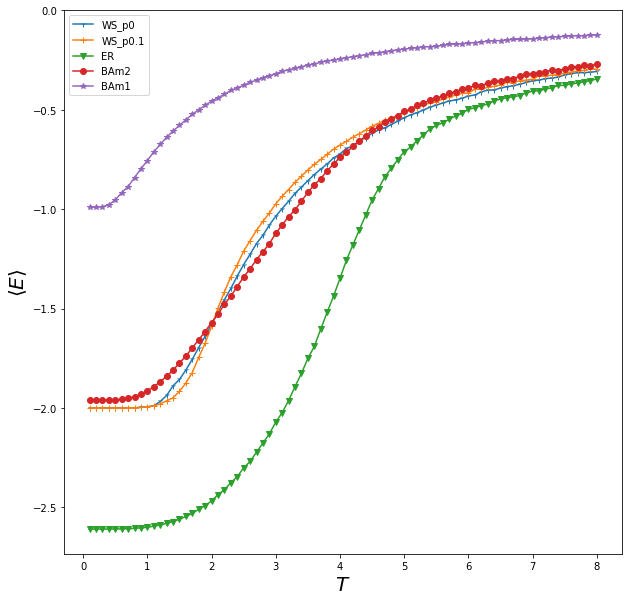

In [5]:
plt.figure(figsize = (10,10))
counter = 0
for magnetizacion in magnetizaciones:
    Temperture = np.unique(magnetizacion[:,0])
    Energy_n_spin = []
    for T in Temperture:
        Energy_n_spin.append(np.mean(magnetizacion[:,2][magnetizacion[:,0] == T]))
        
    plt.plot(Temperture,Energy_n_spin, marker = next(marker), label = labels[counter] )
    plt.xlabel(r'$T$', size = 20)
    plt.ylabel(r'$\langle E \rangle$', size = 20)
    counter += 1
plt.legend()
plt.show()

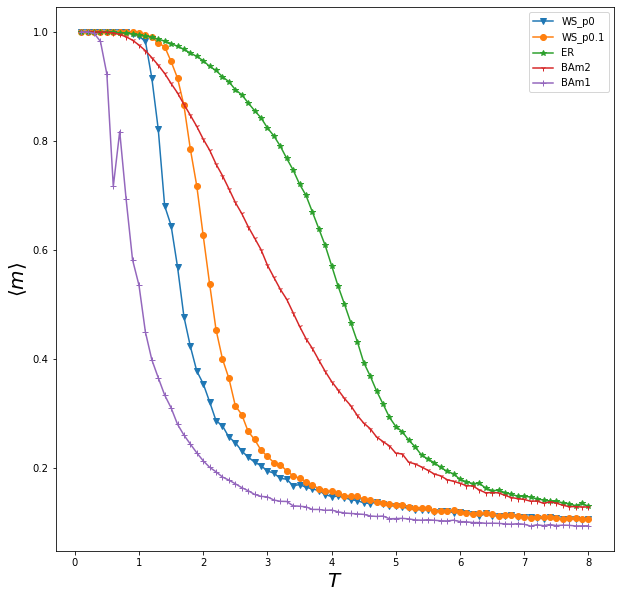

In [56]:
plt.figure(figsize = (10,10))
counter = 0
for magnetizacion in magnetizaciones:
    Temperture = np.unique(magnetizacion[:,0])
    Average_n_spin = []
    for T in Temperture:
        Average_n_spin.append(np.mean(abs(magnetizacion[:,1][magnetizacion[:,0] == T])))
        
    plt.plot(Temperture,Average_n_spin, marker = next(marker), label = labels[counter])
    plt.xlabel(r'$T$', size = 20)
    plt.ylabel(r'$\langle m \rangle$', size = 20)
    counter += 1
plt.legend()
plt.show()

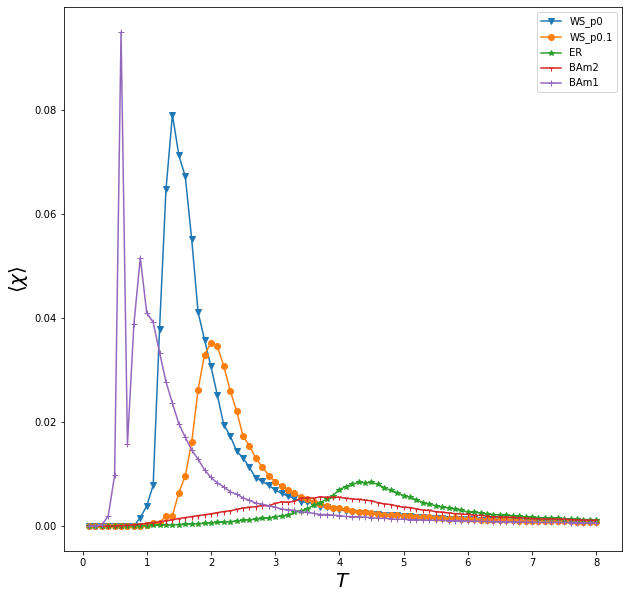

In [57]:
plt.figure(figsize = (10,10))
counter = 0
for magnetizacion in magnetizaciones:
    Temperture = np.unique(magnetizacion[:,0])
    var_n_spin = []
    for T in Temperture:
        var_n_spin.append((np.var(abs(magnetizacion[:,1][magnetizacion[:,0] == T])))/T)
        
    plt.plot(Temperture,var_n_spin, marker = next(marker), label = labels[counter])
    plt.xlabel(r'$T$', size = 20)
    plt.ylabel(r'$\langle \chi \rangle$', size = 20)
    counter += 1
plt.legend()
plt.show()

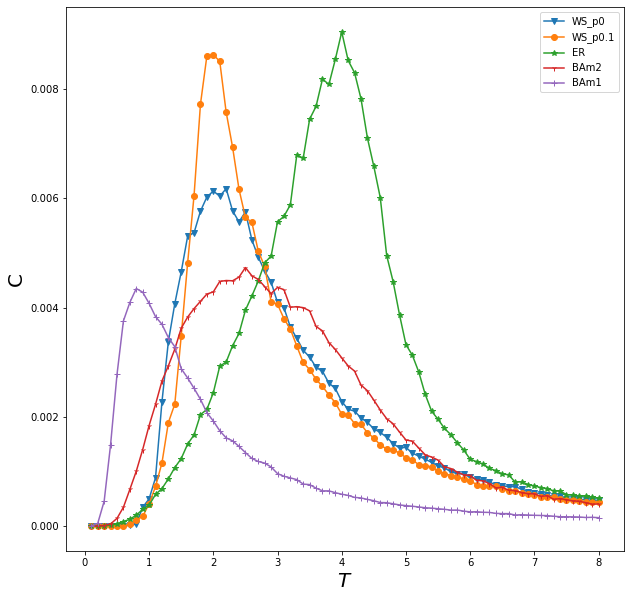

In [58]:
plt.figure(figsize = (10,10))
counter = 0
for magnetizacion in magnetizaciones:
    Temperture = np.unique(magnetizacion[:,0])
    var_energy_n_spin = []
    for T in Temperture:
        var_energy_n_spin.append(np.var(magnetizacion[:,2][magnetizacion[:,0] == T])/T**2)

    plt.plot(Temperture,var_energy_n_spin, marker = next(marker), label = labels[counter])
    plt.xlabel(r'$T$', size = 20)
    plt.ylabel(r'C', size = 20)
    counter += 1
plt.legend()
plt.show()

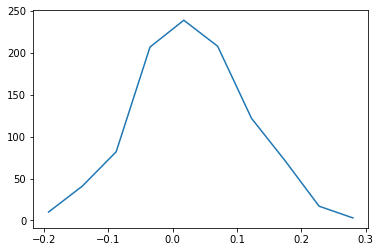

In [59]:
counts, base = np.histogram(magnetizacion[:,1])
plt.plot(base[1::], counts)
plt.show()

In [60]:
np.mean(abs(magnetizacion[:,1]))

0.06850500000000001

In [62]:
np.var(abs(magnetizacion[:,1]))

0.002616089975